In [21]:
# import library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import pymongo
from pymongo import MongoClient

In [3]:
mongo_host = 'localhost'      # Use 'localhost' for the local machine
mongo_port = 27017             # Default MongoDB port
mongo_db = 'KIEMTRA'     # Replace with your MongoDB database

# Create a MongoDB client without username and password
client = MongoClient(f'mongodb://{mongo_host}:{mongo_port}/{mongo_db}')

# Access a specific database
db = client[mongo_db]

# Access a specific collection
collection = db['hd']

In [10]:
# chuyển collection thành dataframe
df = pd.DataFrame(list(collection.find()))

# loại bỏ cột _id xuất hiện khi import data từ mongodb
df = df.drop('_id', axis=1)

In [11]:
# xem dữ liệu 5 dòng đầu
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Female,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,Male,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,Female,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,Female,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,Male,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [13]:
df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [15]:
# kiểm tra loại dữ liệu của các cột và số dòng dữ liệu của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    object 
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(11), 

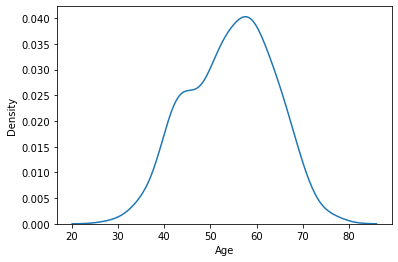

In [23]:
kd=sns.kdeplot(data=df['Age'])

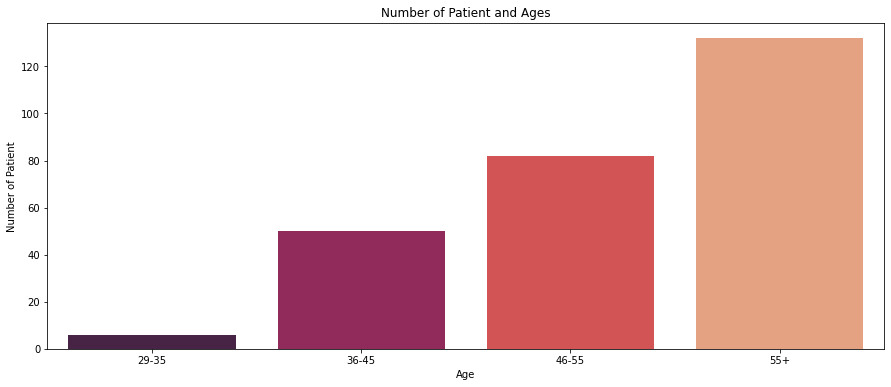

In [19]:
# Gán từng nhóm của age
age29_35 = df.Age[(df.Age <= 35) & (df.Age >= 29)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

# tạo x, y
x = ["29-35","36-45","46-55","55+"]
y = [len(age29_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

# plot biểu đồ có điều chỉnh figsize
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Patient and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Patient")
plt.show()

In [20]:
print(len(age29_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values))

6 50 82 132


# Bài kiểm tra kết thúc ♥